In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('D:/DBDA_Official10/Machine_Learning/Machine_Learning/Assignment/Datasets/insurance_data.csv')

In [3]:
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [6]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [7]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


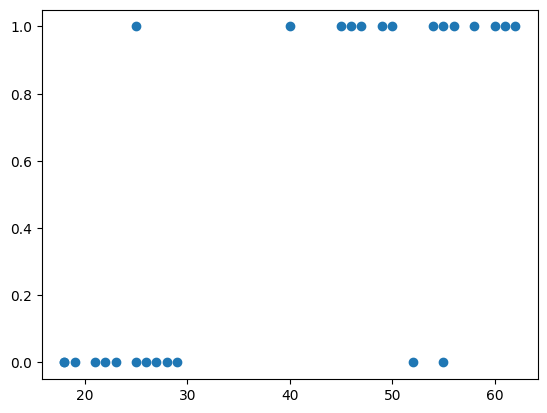

In [8]:
plt.scatter(df['age'],df['bought_insurance'])

Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(df['bought_insurance'])

LabelEncoder()

In [13]:
encoder.classes_

array([0, 1])

In [14]:
df['bought_insurance'] = encoder.transform(df['bought_insurance'])

In [15]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [17]:
x= df.drop(['bought_insurance'],axis = 1)
y = df['bought_insurance']

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 123456)

In [19]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(max_iter = 1000)

model.fit(x_train,y_train)

LogisticRegressionCV(max_iter=1000)

In [22]:
print(model.predict([[58],[30],[20],[49],[53]])) 

[1 0 0 1 1]


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [27]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[2, 1],
       [0, 3]])

In [38]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(accuracy,precision, recall)

0.8333333333333334 0.75 1.0


In [40]:
import pickle
with open("insurance_predictor_model.pkl",'wb') as file1:
    pickle.dump(model,file1)